# Frequent Pattern Growth

In [1]:
# Frequent Pattern Growth:-
# (frequent pattern set,ordered-item set,ordered-item set&conditional frequent pattern tree is built)
# (frequent pattern rules)


In [2]:
import pandas as pd

In [3]:
pd.set_option("display.max_rows",500)


In [4]:
dataset = pd.read_csv(r"C:\Users\Prince Kumar\Downloads\groceries.csv")

In [5]:
dataset.head(4)

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.shape

(9834, 32)

In [7]:
market = []
for i in range(0,dataset.shape[0]):
    cus = []
    for j in dataset.columns:
        if type(dataset[j][i])==str:
            cus.append(dataset[j][i])
    market.append(cus)


In [10]:
l = []
for i in market:
    for j in i:
        l.append(j)

In [14]:
from collections import Counter

p = Counter([1])
print(p)


Counter({1: 1})


In [15]:
d = {"Item Name":p.keys(),"values":p.values()}

In [18]:
pd.DataFrame(d).sort_values(by=["values"],ascending=False)

,Item Name,values
0,1,1


In [19]:
# abb hmm encoding karanga
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

In [20]:
tr = TransactionEncoder()
tr.fit(market)

TransactionEncoder()

In [21]:
df = pd.DataFrame(tr.transform(market),columns=tr.columns_)

In [22]:
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
from mlxtend.frequent_patterns import fpgrowth

In [24]:
fpgrowth(df,min_support=0.07,use_colnames=True,max_len=3).sort_values(by=["support"])

,support,itemsets
17,0.071690,(whipped/sour cream)
11,0.072300,(fruit/vegetable juice)
18,0.074842,"(other vegetables, whole milk)"
3,0.075656,(pip fruit)
14,0.077690,(canned beer)
10,0.079825,(newspapers)
6,0.080537,(bottled beer)
8,0.082672,(citrus fruit)
12,0.088977,(pastry)
15,0.093960,(sausage)


In [26]:
# Esample Learning:-Ensemble Learning = Many weak models → combined → strong model
# (Chote-chote models milkar ek strong accurate model banate hain.)
# max voting,averaging&weight average voting(regression practical)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [49]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [50]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [51]:
dataset = pd.DataFrame(df)

In [52]:
dataset

,x1,x2,y
0,0.228148,0.695329,0
1,2.055266,0.285682,1
2,1.087040,0.615639,0
3,0.958459,0.566696,0
4,0.740834,0.902141,0
...,...,...,...
995,1.479819,-0.266425,1
996,-0.049653,-0.097356,1
997,1.342805,-0.452866,1
998,-0.360119,0.934199,0


In [53]:
import seaborn as sns

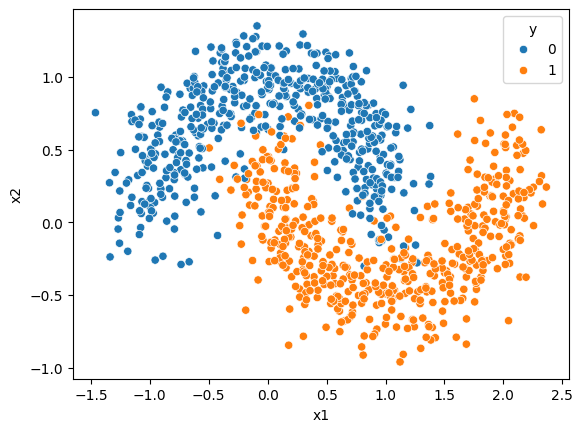

In [54]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [55]:
# depend or independent variable alag alag
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [56]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [62]:
# model ki accuracy check karanga or model ko train karta hai
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [63]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(100.0, 96.0)

In [64]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, sv.score(x_test,y_test)*100

(96.5, 94.0)

In [65]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100, gnb.score(x_test,y_test)*100

(87.875, 83.5)

In [68]:
# abb use karta hai voting classifier/means esamble learning
from sklearn.ensemble import VotingClassifier

In [69]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [70]:
vc = VotingClassifier(li)
vc.fit(x_train,y_train)

,estimators,"[('dt1', ...), ('sv1', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [71]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.375, 94.5)

In [74]:
prd = {"dt":dt.predict(x_test),"svm":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [75]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,1,1,1,1
1,1,1,0,1
2,1,1,1,1
3,1,1,1,1
4,0,0,0,0
5,1,1,1,1
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,1,1,1,1
